<a href="https://colab.research.google.com/github/luizhsalazar/prontuarios-absenteismo/blob/master/dados_prontuario_consultas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregamento do dataset, merge dos dados dos prontuários e rename de colunas

In [1]:
import pandas as pd
import numpy as np

from datetime import date, datetime
from datetime import date

import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path_prontuarios1 = 'https://raw.githubusercontent.com/luizhsalazar/prontuarios-absenteismo/master/prontuarios.csv'
path_prontuarios2 = 'https://raw.githubusercontent.com/luizhsalazar/prontuarios-absenteismo/master/prontuario-controle-usuarios.csv'

prontuarios1 = pd.read_csv(path_prontuarios1)
prontuarios2 = pd.read_csv(path_prontuarios2)

prontuarios = pd.merge(prontuarios1, prontuarios2, how='left', on=['num_prontuario'])

# prontuarios.to_csv('prontuarios.csv') 

In [3]:
rename = {    
    'Genero': 'genero',
    'Data da consulta': 'data_consulta',
    'Compareceu': 'compareceu',
    'Justificativa': 'justificativa',
    'DEF.' : 'tipo_deficiencia',
    'DATA DE NASCIMENTO' : 'data_nascimento',
    'DATA ENTRADA no Serviço' : 'data_entrada_servico',
    'PROCEDÊNCIA' : 'procedencia',
    'CID' : 'codigo_cid',
    'UBS' : 'unidade_basica_envio',
}
dados = prontuarios.rename(columns=rename)
dados.columns

Index(['num_prontuario', 'genero', 'data_consulta', 'compareceu',
       'justificativa', 'tipo_deficiencia', 'data_nascimento',
       'data_entrada_servico', 'procedencia', 'codigo_cid',
       'unidade_basica_envio'],
      dtype='object')

# Data Cleaning



In [4]:
print(dados['genero'].unique())
print(dados['genero'].value_counts())
print('--------------------')
print(dados['compareceu'].unique())
print(dados['compareceu'].value_counts())
print('--------------------')
print(dados['tipo_deficiencia'].unique())
print(dados['tipo_deficiencia'].value_counts())

['M' 'F' nan]
M    3575
F    1234
Name: genero, dtype: int64
--------------------
['Sim' 'Não' nan 'não' 'Falta justificada']
Sim                  4254
Não                   555
não                     1
Falta justificada       1
Name: compareceu, dtype: int64
--------------------
['I' 'F' 'I ' ' ']
I     3311
F     1491
         7
I        3
Name: tipo_deficiencia, dtype: int64


In [5]:
# Replace de dados incorretos coluna de tipo_deficiencia
dados.loc[dados['tipo_deficiencia'] == 'I ', 'tipo_deficiencia'] = 'I'

print(dados['tipo_deficiencia'].unique())
print(dados['tipo_deficiencia'].value_counts())

['I' 'F' ' ']
I    3314
F    1491
        7
Name: tipo_deficiencia, dtype: int64


In [6]:
# Replace de dados incorretos coluna compareceu
dados.loc[dados['compareceu'].isin(['não', 'Falta justificada']), 'compareceu'] = 'Não'

print(dados['compareceu'].unique())
print(dados['compareceu'].value_counts())

['Sim' 'Não' nan]
Sim    4254
Não     557
Name: compareceu, dtype: int64


## Ajuste de formato de datas para *dia/mês/ano* e remoção de datas de consulta diferentes de 2019

In [7]:
dados.data_consulta.value_counts()

17/9/2019     81
18/10/2019    80
2/9/2019      80
16/9/2019     79
20/9/2019     69
              ..
12/12/2017     3
27/11/2017     3
22/11/2017     2
5/12/2017      2
8/11/2017      2
Name: data_consulta, Length: 173, dtype: int64

In [8]:
def convert_data_zero_esquerda(data):
  data_original = datetime.strptime(data, '%d/%m/%Y').date()
  dataFormatada = data_original.strftime('%d/%m/%Y')
  return dataFormatada

dados['data_consulta'] = dados.data_consulta.apply(convert_data_zero_esquerda)

dados.data_consulta.value_counts()

17/09/2019    81
02/09/2019    80
18/10/2019    80
16/09/2019    79
20/09/2019    69
              ..
27/11/2017     3
28/11/2017     3
08/11/2017     2
22/11/2017     2
05/12/2017     2
Name: data_consulta, Length: 173, dtype: int64

In [9]:
print('%d prontuários com datas de consultas diferentes de 2019' % len(dados[pd.to_datetime(dados['data_consulta']).dt.year != 2019]))

dados = dados[pd.to_datetime(dados['data_consulta']).dt.year == 2019]

print('%d prontuários para análise' % len(dados))

90 prontuários com datas de consultas diferentes de 2019
4722 prontuários para análise


## Merge com nome do **CID** do motivo da consulta

In [10]:
print("%d prontuários sem CID informado." % dados.codigo_cid.isna().sum())
print("%d diferentes CIDs cadastrados." % len(dados.codigo_cid.unique()))

1662 prontuários sem CID informado.
55 diferentes CIDs cadastrados.


In [11]:
path_json_cids = 'https://raw.githubusercontent.com/luizhsalazar/prontuarios-absenteismo/master/cid10.json'
dados_cid = pd.read_json(path_json_cids)

In [12]:
# Visualização dos CIDs do dataset original
dados.codigo_cid.value_counts()

F 84                470
F84                 312
R68                 277
F840                238
R 68                205
I64                 176
F 84.0              165
F84.0               143
G458                 89
R 68.0               80
f 84                 64
R68 (F840)           58
G934                 52
G 45                 45
R68 (F84.0)          39
R 47.1 / G 81        39
Z00                  39
Z001                 37
R463                 34
G 11                 34
R68 (G11.3)          31
G81+R41.1+R13        31
I 69.4               27
F 83                 27
r68                  25
F90 (TDAH)           24
F 84.5               24
G37                  23
Q059                 22
I 64                 22
f71/f84              22
R471                 21
F80 +WEST            16
F84.5                16
G11                  15
G 20                 14
R68.0 - Q04          13
K02                  12
R61.0                12
Q052                 11
G713                  9
f83.0           

In [13]:
def clean_codigo_cid(codigo_cid):
  if (pd.isnull(codigo_cid) or codigo_cid == ''): return np.nan

  codigo_cid_retorno = ''
  codigo_cid_retorno = codigo_cid.strip().upper().replace(' ', '')

  if (len(codigo_cid_retorno) > 3 and codigo_cid_retorno[3] != '.'):
    codigo_cid_retorno = codigo_cid_retorno[:3] + '.' + codigo_cid_retorno[3:]

  return codigo_cid_retorno

dados['codigo_cid'] = dados.codigo_cid.apply(clean_codigo_cid)

In [14]:
# Ajuste codigos CID formato inválido - Total de 12 CIDs corrigidos
# Nos casos com mais de uma doença inserida, foi considerada apenas a primeira

dados.loc[dados['codigo_cid'] == 'R68.(F840)', 'codigo_cid']  = 'R68'
dados.loc[dados['codigo_cid'] == 'R68.(F84.0)', 'codigo_cid']  = 'R68'
dados.loc[dados['codigo_cid'] == 'R47.1/G81', 'codigo_cid']  = 'R47.1'
dados.loc[dados['codigo_cid'] == 'G81.+R41.1+R13', 'codigo_cid']  = 'G81'

dados.loc[dados['codigo_cid'] == 'R68.(G11.3)', 'codigo_cid']  = 'R68'
dados.loc[dados['codigo_cid'] == 'F90.(TDAH)', 'codigo_cid']  = 'F90'
dados.loc[dados['codigo_cid'] == 'F71./F84', 'codigo_cid']  = 'F71'
dados.loc[dados['codigo_cid'] == 'F80.+WEST', 'codigo_cid']  = 'F80'

dados.loc[dados['codigo_cid'] == 'R68.0-Q04', 'codigo_cid']  = 'R68.0'
dados.loc[dados['codigo_cid'] == 'F80.9,F84.0', 'codigo_cid']  = 'F80.9'
dados.loc[dados['codigo_cid'] == 'R68.0-F84.0', 'codigo_cid']  = 'R68.0'
dados.loc[dados['codigo_cid'] == 'F84.0+F90+F42+R26', 'codigo_cid']  = 'F84.0'

In [15]:
# Visualização dos CIDs corrigidos inicialmente
dados.codigo_cid.value_counts()

F84      846
R68      635
F84.0    548
I64      198
R68.0    101
G45.8     89
R47.1     60
G93.4     56
G11       49
G45       45
F84.5     40
Z00       39
Z00.1     37
R46.3     34
G81       31
I69.4     27
F83       27
F90       24
G37       23
F71       22
Q05.9     22
F80       16
G20       14
K02       12
R61.0     12
Q05.2     11
F83.0      9
G71.3      9
J06        5
S72.3      4
I69        4
G21.3      4
T00        3
F71.2      2
G40        1
Z71.2      1
Name: codigo_cid, dtype: int64

In [16]:
def nome_doenca(codigo_cid):
  if (pd.isnull(codigo_cid) or codigo_cid == ''): return np.nan

  return dados_cid[dados_cid['codigo'] == codigo_cid].nome.max()

dados['nome_cid'] = dados.codigo_cid.apply(nome_doenca)

In [17]:
dados_com_codigo_cid = dados[dados['codigo_cid'].notna()]
dados_com_nome_cid = dados[dados['nome_cid'].notna()]

dados_com_codigo_cid.nome_cid.value_counts()

Transtornos Globais do Desenvolvimento                                                       846
Outros Sintomas e Sinais Gerais                                                              635
Autismo Infantil                                                                             548
Acidente Vascular Cerebral, Não Especificado Como Hemorrágico ou Isquêmico                   198
Hipotermia Não Associada à Baixa Temperatura Ambiental                                       101
Outros Acidentes Isquêmicos Cerebrais Transitórios e Síndromes Correlatas                     89
Disartria e Anartria                                                                          60
Encefalopatia Não Especificada                                                                56
Ataxia Hereditária                                                                            49
Acidentes Vasculares Cerebrais Isquêmicos Transitórios e Síndromes Correlatas                 45
Síndrome de Asperger          

In [18]:
print('%d prontuários com CID informados' % len(dados_com_codigo_cid))
print('%d prontuários com NOME do CID mapeados' % len(dados_com_nome_cid))

3060 prontuários com CID informados
3049 prontuários com NOME do CID mapeados


## Condições **climáticas** na cidade na data da consulta

In [19]:
path_csv_dados_clima_itajai = 'https://raw.githubusercontent.com/luizhsalazar/prontuarios-absenteismo/master/FINAL_S_SC_A868_ITAJAI.csv'
dados_clima_itajai = pd.read_csv(path_csv_dados_clima_itajai, sep=';')

In [20]:
dados_clima_itajai.head()

,Data,Hora UTC,Precipitacao,Temperatura
0,2019/01/01,0000 UTC,0.0,25.4
1,2019/01/01,0100 UTC,0.0,25.2
2,2019/01/01,0200 UTC,0.0,25.3
3,2019/01/01,0300 UTC,0.0,24.4
4,2019/01/01,0400 UTC,0.0,24.1


In [21]:
def convert_data_pt_br(data):
  data_original = datetime.strptime(data, '%Y/%m/%d').date()
  dataFormatada = data_original.strftime('%d/%m/%Y')
  return dataFormatada

dados_clima_itajai['Data'] = dados_clima_itajai.Data.apply(convert_data_pt_br)

dados_clima_itajai.head()

,Data,Hora UTC,Precipitacao,Temperatura
0,01/01/2019,0000 UTC,0.0,25.4
1,01/01/2019,0100 UTC,0.0,25.2
2,01/01/2019,0200 UTC,0.0,25.3
3,01/01/2019,0300 UTC,0.0,24.4
4,01/01/2019,0400 UTC,0.0,24.1


In [22]:
media_temp_precip_por_dia_calc = np.around(dados_clima_itajai.groupby(['Data'])[['Temperatura', 'Precipitacao']].mean(), decimals=2).reset_index()

media_temp_precip_por_dia = pd.concat([media_temp_precip_por_dia_calc], axis=1)
media_temp_precip_por_dia.columns = ['data', 'temperatura_media_dia', 'precipitacao_media_dia']

# media_temp_precip_por_dia.to_csv('temperatura_precipitacao_media_dia.csv')

In [23]:
media_temp_precip_por_dia.tail()

,data,temperatura_media_dia,precipitacao_media_dia
360,31/05/2019,19.29,1.20
361,31/07/2019,16.45,0.01
362,31/08/2019,18.86,0.02
363,31/10/2019,24.49,0.00
364,31/12/2019,26.01,0.03


In [24]:
# Merge todos dados
dados = pd.merge(dados, media_temp_precip_por_dia, how='left', left_on=['data_consulta'], right_on=['data'])

# Mantém apenas temperaturas e precipitação da cidade de Itajaí (dados de clima são apenas de Itajaí)
def not_itajai(dado, is_precipitacao):
  if (dado['procedencia'] != 'ITAJAÍ'): return ''
  return dado['precipitacao_media_dia'] if is_precipitacao else dado['temperatura_media_dia']

dados['precipitacao_media_dia'] = dados.apply(not_itajai, is_precipitacao=True, axis=1)
dados['temperatura_media_dia'] = dados.apply(not_itajai, is_precipitacao=False, axis=1)

dados = dados.drop(columns=['data'])

# dados_merged_clima.to_csv('dados_merged_clima.csv')

In [25]:
dados.columns

Index(['num_prontuario', 'genero', 'data_consulta', 'compareceu',
       'justificativa', 'tipo_deficiencia', 'data_nascimento',
       'data_entrada_servico', 'procedencia', 'codigo_cid',
       'unidade_basica_envio', 'nome_cid', 'temperatura_media_dia',
       'precipitacao_media_dia'],
      dtype='object')

## Validação/Correção de datas formato inválido e criação de coluna de **idade** com base na data de nascimento

In [26]:
def valida_formato_data(data_nascimento):
    if (pd.isnull(data_nascimento) or data_nascimento == '' or data_nascimento == ' '): return ''

    try:
      data = datetime.strptime(data_nascimento, "%d/%m/%Y").date()
    except ValueError as err:
      print('Data com formato inválido: ' + data_nascimento)
      pass

dados['data_nascimento'].apply(valida_formato_data)

Data com formato inválido: 13/02/60
Data com formato inválido: 13/02/60
Data com formato inválido: 13/02/60
Data com formato inválido: 13/02/60
Data com formato inválido: 13/02/60
Data com formato inválido: 13/02/60
Data com formato inválido: 13/02/60
Data com formato inválido: 07/082015
Data com formato inválido: 07/082015
Data com formato inválido: 13/02/60
Data com formato inválido: 13/02/60
Data com formato inválido: 13/02/60
Data com formato inválido: 13/02/60
Data com formato inválido: 13/02/60
Data com formato inválido: 07/082015
Data com formato inválido: 13/02/60
Data com formato inválido: 13/02/60
Data com formato inválido: 13/02/60
Data com formato inválido: 13/02/60
Data com formato inválido: 13/02/60
Data com formato inválido: 13/02/60
Data com formato inválido: 07/082015
Data com formato inválido: 07/082015
Data com formato inválido: 07/082015
Data com formato inválido: 13/02/60
Data com formato inválido: 13/02/60
Data com formato inválido: 07/082015
Data com formato invá

0           
1           
2       None
3       None
4       None
        ... 
4717    None
4718        
4719    None
4720    None
4721    None
Name: data_nascimento, Length: 4722, dtype: object

In [27]:
# Ajuste datas formato inválido

dados.loc[dados['data_nascimento'] == '13/02/60', 'data_nascimento']  = '13/02/1960'
dados.loc[dados['data_nascimento'] == '07/082015', 'data_nascimento'] = '07/08/2015'
dados.loc[dados['data_nascimento'] == '03/03/15', 'data_nascimento']  = '03/03/2015'

In [28]:
from datetime import datetime
from datetime import date
import numpy as np

def calcula_idade(data_nascimento):
    if (pd.isnull(data_nascimento) or data_nascimento == '' or data_nascimento == ' '): return -1

    try:
      data = datetime.strptime(data_nascimento, "%d/%m/%Y").date()
      today = date.today()
      return today.year - data.year - ((today.month, today.day) < (data.month, data.day))
    except ValueError as err:
      print('Erro ao converter a data: ' + data_nascimento)
      pass

dados['idade'] = dados['data_nascimento'].apply(calcula_idade)

In [29]:
print("Total de pacientes com idade incluída: %d" % len(dados[dados['idade'] > 0]))
print("Total de pacientes com idade faltante: %d" % len(dados[dados['idade'] == -1]))

Total de pacientes com idade incluída: 3446
Total de pacientes com idade faltante: 1276


## Criação da coluna de **mês da consulta**

In [30]:
from datetime import datetime
from datetime import date
import numpy as np

MONTHS = {1: 'jan', 2: 'fev', 3: 'mar', 4: 'abr', 5: 'mai', 6: 'jun',
          7: 'jul', 8: 'ago', 9: 'set', 10: 'out', 11: 'nov', 12: 'dez'}

def extrai_mes_consulta(data):
    try:
      data = datetime.strptime(data, "%d/%m/%Y").date()
      return MONTHS[data.month]
    except ValueError as err:
      print('Data com formato inválido: ' + data)
      pass

dados['mes_consulta'] = dados['data_consulta'].apply(extrai_mes_consulta)

dados['mes_consulta'].value_counts()

set    908
out    802
jul    726
ago    693
mai    447
abr    430
jun    377
nov    339
Name: mes_consulta, dtype: int64

## Criação coluna **paciente_contactado** que indica se houve contato/comunicação com o paciente

In [31]:
dados_pacientes_contactados = dados[dados['justificativa'].notna()]
count_pacientes_contactados = dados_pacientes_contactados.compareceu.value_counts()

print("%d pacientes foram contactados (apresentaram justificativa) com o pessoal do SER." % len(dados_pacientes_contactados))
print("Logo, apenas %s%% do total de pacientes tiveram comunicação com o pessoal do SER." %
      round((len(dados_pacientes_contactados) / len(dados))*100, 2))
print("Dos pacientes que foram contactados, %d não compareceram e %d compareceram à consulta." %
      (count_pacientes_contactados["Não"], count_pacientes_contactados["Sim"]))

327 pacientes foram contactados (apresentaram justificativa) com o pessoal do SER.
Logo, apenas 6.93% do total de pacientes tiveram comunicação com o pessoal do SER.
Dos pacientes que foram contactados, 321 não compareceram e 6 compareceram à consulta.


In [32]:
# Criação de coluna 'paciente_contactado' para análise no modelo de ML
dados['paciente_contactado'] = dados.justificativa.apply(lambda x: 0 if x == '' or pd.isnull(x) else 1)

dados.paciente_contactado.value_counts()

0    4395
1     327
Name: paciente_contactado, dtype: int64

## Exportação para CSV dos dados completos

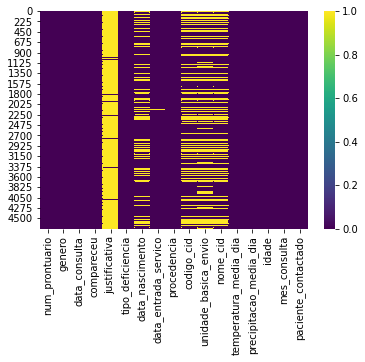

In [33]:
sns.heatmap(dados.isnull(), cmap='viridis')

In [34]:
print(dados.columns)
dados.to_csv('dados_prontuarios.csv')

Index(['num_prontuario', 'genero', 'data_consulta', 'compareceu',
       'justificativa', 'tipo_deficiencia', 'data_nascimento',
       'data_entrada_servico', 'procedencia', 'codigo_cid',
       'unidade_basica_envio', 'nome_cid', 'temperatura_media_dia',
       'precipitacao_media_dia', 'idade', 'mes_consulta',
       'paciente_contactado'],
      dtype='object')


# Data Analysis

## Comparecimento nas consultas com base na **idade**

In [35]:
from pandas import DataFrame

rows_idade_valida = dados[dados['idade'] > 0]

# Top 10 das idades frequentes nas consultas
idades_frequencia_df = pd.DataFrame(rows_idade_valida['idade'].value_counts())
idades_frequencia_df.index.name = 'idade'
idades_frequencia_df.columns = ['frequência']
idades_frequencia_df.head()

,frequência
idade,
4,357
5,346
6,333
12,228
9,217


In [36]:
# Média de idade 20 anos e mediana de 9 anos

rows_idade_valida['idade'].describe()

count    3446.000000
mean       20.313117
std        23.988550
min         1.000000
25%         5.000000
50%         9.000000
75%        30.000000
max       108.000000
Name: idade, dtype: float64

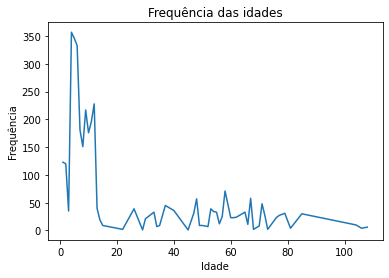

In [38]:
idades_frequencia = rows_idade_valida['idade'].value_counts().sort_index()

idades_frequencia.plot()

plt.title('Frequência das idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.show()

Text(0.5, 1.0, 'Distribuição de idades dos pacientes')

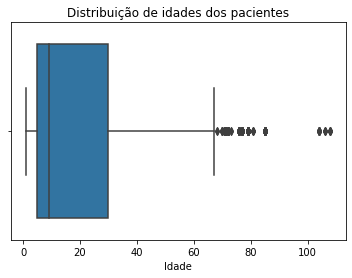

In [39]:
ax = sns.boxplot(rows_idade_valida.idade)
ax.set(xlabel = "Idade")
ax.set_title("Distribuição de idades dos pacientes")

## Comparecimento nas consultas com base no **sexo**

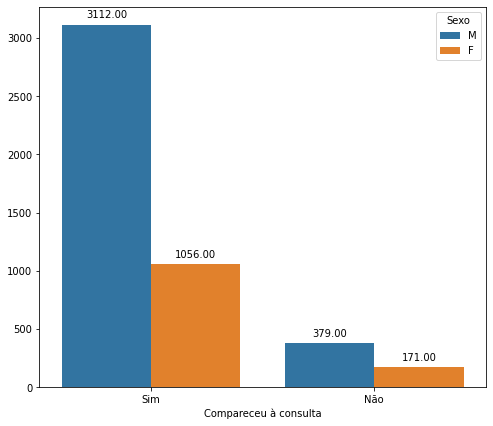

In [40]:
plt.figure(figsize=(8,7))

chart = sns.countplot(x='compareceu', hue='genero', data=dados)
chart.set(xlabel = "Compareceu à consulta", ylabel="")
chart.legend(title='Sexo')

for p in chart.patches:
  chart.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                 p.get_height()), ha = 'center',
                                                 va = 'center', xytext = (0, 10), 
                                                 textcoords = 'offset points')

## Comparecimento nas consultas com base no **mês**



In [41]:
dados['mes_consulta'].value_counts().head()

set    908
out    802
jul    726
ago    693
mai    447
Name: mes_consulta, dtype: int64

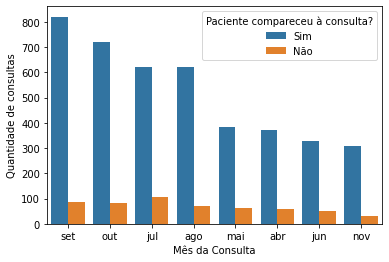

In [42]:
chart = sns.countplot(x='mes_consulta', hue='compareceu', data=dados, order = dados['mes_consulta'].value_counts().index)
chart.set(xlabel='Mês da Consulta', ylabel='Quantidade de consultas')
chart.legend(title='Paciente compareceu à consulta?')

## Comparecimento na consulta com base na cidade de **procedência** do paciente

In [43]:
dados_procedencia_valida = dados[dados['procedencia'].notna()]

print("%d prontuários sem cidade de procedência informada." % dados.procedencia.isna().sum())
print("%d cidades distintas de procedência dos pacientes: %s" % (len(dados_procedencia_valida.procedencia.unique()), dados_procedencia_valida.procedencia.unique().tolist()) )

5 prontuários sem cidade de procedência informada.
13 cidades distintas de procedência dos pacientes: ['ITAJAÍ', 'ITAPEMA', 'CAMBORIU', 'BALN. CAMBORIU', 'NAVEGANTES', 'PENHA', 'BOMBINHAS', 'BALN. PIÇARRAS', 'ILHOTA', 'PORTO BELO', 'BLUMENAU', 'LUIZ ALVES', 'MONTENEGRO']


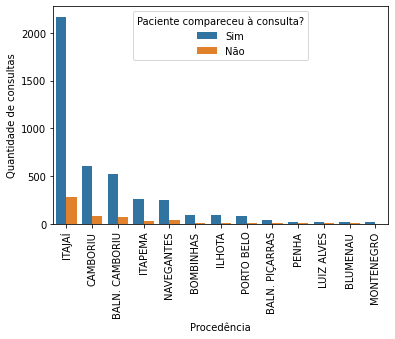

In [44]:
chart = sns.countplot(x='procedencia', hue='compareceu', data=dados_procedencia_valida, order = dados_procedencia_valida['procedencia'].value_counts().index)
chart.set(xlabel='Procedência', ylabel='Quantidade de consultas')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.legend(title='Paciente compareceu à consulta?')

### Dados da cidade de Itajaí

In [45]:
dados_procedencia_itajai = dados[dados['procedencia'] == 'ITAJAÍ']

print("%d pacientes com procedência da cidade de Itajaí" % len(dados_procedencia_itajai))

2454 pacientes com procedência da cidade de Itajaí


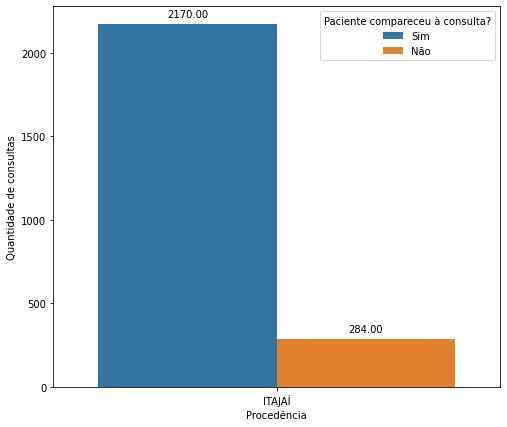

In [46]:
plt.figure(figsize=(8,7))

chart = sns.countplot(x='procedencia', hue='compareceu', data=dados_procedencia_itajai)
chart.set(xlabel='Procedência', ylabel='Quantidade de consultas')
chart.legend(title='Paciente compareceu à consulta?')

# Inserção dos valores no lado direito do gráfico
# ax2 = chart.twinx()
# ax2.set_yticks(np.arange(0, 110, 10)*len(dados_procedencia_itajai)/100)

for p in chart.patches:
  chart.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                 p.get_height()), ha = 'center',
                                                 va = 'center', xytext = (0, 10), 
                                                 textcoords = 'offset points')

In [47]:
percent_itajai_nao_comparece = len(dados_procedencia_itajai[dados_procedencia_itajai['compareceu'] == 'Não']) / len(dados_procedencia_itajai)
  
print("%s%% dos pacientes não comparecem as consultas provenientes da cidade de Itajaí." % round((percent_itajai_nao_comparece * 100), 2)  )

11.57% dos pacientes não comparecem as consultas provenientes da cidade de Itajaí.


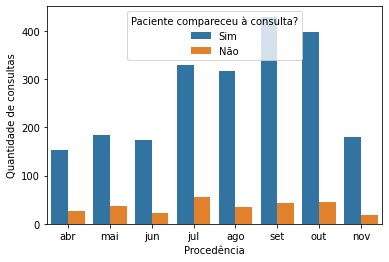

In [48]:
# Análise da cidade de itajaí com base no número de comparecimentos ao longo dos meses
# cidade x compareceu x meses

chart = sns.countplot(x='mes_consulta', hue='compareceu', data=dados_procedencia_itajai)
chart.set(xlabel='Procedência', ylabel='Quantidade de consultas')
chart.legend(title='Paciente compareceu à consulta?', loc="upper center")